In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv("./4개지역_FLOW_AGE_201902.CSV",sep="|")

In [3]:
train_df

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,...,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
0,201902,20190201,1114052000,소공동,16.64,116.18,419.70,1553.57,5196.07,11195.62,...,13323.19,12741.15,11628.80,10006.80,9807.06,8099.38,7260.17,5757.53,3359.85,4431.71
1,201902,20190202,1114052000,소공동,3.14,141.07,763.30,1405.29,4235.82,7592.34,...,7898.27,6580.27,5714.75,4946.22,5055.32,4560.27,4364.57,3838.77,2453.97,3207.26
2,201902,20190203,1114052000,소공동,1.38,120.39,698.23,1117.17,3032.90,5173.35,...,5079.63,4454.43,3905.32,3484.47,3703.24,3270.26,2984.05,2484.98,1511.67,1954.98
3,201902,20190204,1114052000,소공동,0.08,141.61,772.41,1248.85,3001.95,4641.82,...,4317.63,3676.47,3506.37,3108.99,3324.07,2841.35,2644.42,2164.35,1230.21,1520.35
4,201902,20190205,1114052000,소공동,0.00,254.70,1394.92,2190.69,3420.15,5478.30,...,4813.86,4967.92,5161.96,4856.63,5212.69,4462.94,4183.38,3265.62,1692.74,2147.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,201902,20190224,2726069000,고산3동,0.05,146.86,677.67,1084.16,1545.11,1952.14,...,1502.39,1492.40,1980.33,2176.22,2912.72,2346.66,2167.17,1581.96,892.01,990.72
1928,201902,20190225,2726069000,고산3동,0.05,187.83,534.66,1024.18,1490.25,1840.75,...,1419.83,1502.75,2289.69,2481.96,3172.65,2942.42,2454.88,1797.78,1038.36,1206.05
1929,201902,20190226,2726069000,고산3동,0.03,146.97,494.97,925.04,1413.57,1748.78,...,1472.12,1493.60,2205.07,2522.17,3444.12,2866.35,2494.56,1863.79,1044.34,1225.85
1930,201902,20190227,2726069000,고산3동,0.08,164.30,555.82,1027.75,1437.50,1798.46,...,1436.20,1433.72,2195.25,2493.84,3286.59,2916.41,2450.63,1738.96,1014.68,1065.82


전처리 해야할 것
1. 데이터 스케일링
2. 데이터 나누기(슬라이스) - 남자/여자 성별로, 나이대 별로, 년도 별로, 각 년도 동월 기준으로 등등.
3. 그래프 그리기

In [4]:
# HDONG_0 = train_df[:28]
# HDONG_1 = train_df[28:56]
# 1932 / 28 = 69 . HDONG_68 이 마지막

code = 0

for index in range(0,1932,28):
    globals()['HDONG_{}'.format(code)] = train_df[index:index+28]
    code += 1
    
HDONG_0

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,...,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
0,201902,20190201,1114052000,소공동,16.64,116.18,419.70,1553.57,5196.07,11195.62,...,13323.19,12741.15,11628.80,10006.80,9807.06,8099.38,7260.17,5757.53,3359.85,4431.71
1,201902,20190202,1114052000,소공동,3.14,141.07,763.30,1405.29,4235.82,7592.34,...,7898.27,6580.27,5714.75,4946.22,5055.32,4560.27,4364.57,3838.77,2453.97,3207.26
2,201902,20190203,1114052000,소공동,1.38,120.39,698.23,1117.17,3032.90,5173.35,...,5079.63,4454.43,3905.32,3484.47,3703.24,3270.26,2984.05,2484.98,1511.67,1954.98
3,201902,20190204,1114052000,소공동,0.08,141.61,772.41,1248.85,3001.95,4641.82,...,4317.63,3676.47,3506.37,3108.99,3324.07,2841.35,2644.42,2164.35,1230.21,1520.35
4,201902,20190205,1114052000,소공동,0.00,254.70,1394.92,2190.69,3420.15,5478.30,...,4813.86,4967.92,5161.96,4856.63,5212.69,4462.94,4183.38,3265.62,1692.74,2147.09
5,201902,20190206,1114052000,소공동,11.77,146.26,726.41,1611.41,3695.22,6218.99,...,5864.72,4851.87,4530.79,3800.53,4031.96,3687.35,3526.07,3040.49,1806.17,2258.62
6,201902,20190207,1114052000,소공동,7.59,88.41,408.34,1810.07,5438.19,9991.07,...,12005.40,11441.02,10416.02,9339.48,9138.91,7463.96,6720.88,5576.05,3206.15,4108.08
7,201902,20190208,1114052000,소공동,7.20,113.71,418.49,2031.29,5986.55,11318.45,...,13638.81,12571.91,11618.16,10351.98,10378.90,8469.30,7450.31,6100.74,3416.34,4434.72
8,201902,20190209,1114052000,소공동,3.58,204.35,996.84,2309.83,5352.29,8734.89,...,9691.19,7831.02,6876.29,6138.09,6710.51,5776.69,5611.46,5010.05,3169.95,3798.83
9,201902,20190210,1114052000,소공동,0.89,169.54,829.00,1792.23,4462.51,6531.86,...,7025.35,5467.45,4903.23,4387.74,4781.48,4156.05,4090.89,3607.99,2155.15,2987.47


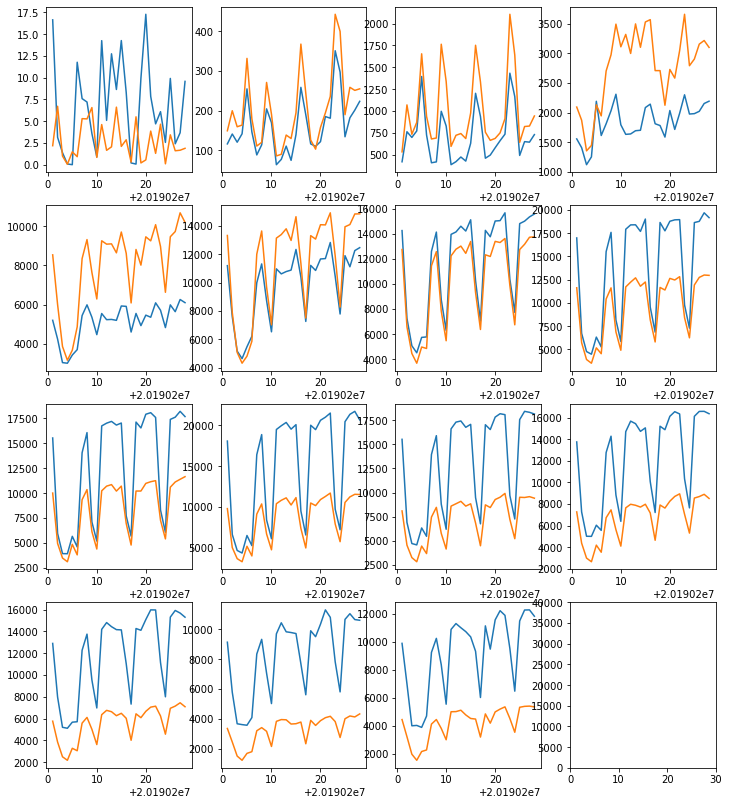

In [36]:
fig, axes = plt.subplots(nrows=4,ncols=4)
fig.set_size_inches(12, 14)
axes[0][0].plot(HDONG_0["STD_YMD"], HDONG_0["MAN_FLOW_POP_CNT_0004"])
axes[0][0].plot(HDONG_0["STD_YMD"], HDONG_0["WMAN_FLOW_POP_CNT_0004"])
axes[0][1].plot(HDONG_0["STD_YMD"], HDONG_0["MAN_FLOW_POP_CNT_0509"])
axes[0][1].plot(HDONG_0["STD_YMD"], HDONG_0["WMAN_FLOW_POP_CNT_0509"])
axes[0][2].plot(HDONG_0["STD_YMD"], HDONG_0["MAN_FLOW_POP_CNT_1014"])
axes[0][2].plot(HDONG_0["STD_YMD"], HDONG_0["WMAN_FLOW_POP_CNT_1014"])
axes[0][3].plot(HDONG_0["STD_YMD"], HDONG_0["MAN_FLOW_POP_CNT_1519"])
axes[0][3].plot(HDONG_0["STD_YMD"], HDONG_0["WMAN_FLOW_POP_CNT_1519"])
axes[1][0].plot(HDONG_0["STD_YMD"], HDONG_0["MAN_FLOW_POP_CNT_2024"])
axes[1][0].plot(HDONG_0["STD_YMD"], HDONG_0["WMAN_FLOW_POP_CNT_2024"])
axes[1][1].plot(HDONG_0["STD_YMD"], HDONG_0["MAN_FLOW_POP_CNT_2529"])
axes[1][1].plot(HDONG_0["STD_YMD"], HDONG_0["WMAN_FLOW_POP_CNT_2529"])
axes[1][2].plot(HDONG_0["STD_YMD"], HDONG_0["MAN_FLOW_POP_CNT_3034"])
axes[1][2].plot(HDONG_0["STD_YMD"], HDONG_0["WMAN_FLOW_POP_CNT_3034"])
axes[1][3].plot(HDONG_0["STD_YMD"], HDONG_0["MAN_FLOW_POP_CNT_3539"])
axes[1][3].plot(HDONG_0["STD_YMD"], HDONG_0["WMAN_FLOW_POP_CNT_3539"])
axes[2][0].plot(HDONG_0["STD_YMD"], HDONG_0["MAN_FLOW_POP_CNT_4044"])
axes[2][0].plot(HDONG_0["STD_YMD"], HDONG_0["WMAN_FLOW_POP_CNT_4044"])
axes[2][1].plot(HDONG_0["STD_YMD"], HDONG_0["MAN_FLOW_POP_CNT_4549"])
axes[2][1].plot(HDONG_0["STD_YMD"], HDONG_0["WMAN_FLOW_POP_CNT_4549"])
axes[2][2].plot(HDONG_0["STD_YMD"], HDONG_0["MAN_FLOW_POP_CNT_5054"])
axes[2][2].plot(HDONG_0["STD_YMD"], HDONG_0["WMAN_FLOW_POP_CNT_5054"])
axes[2][3].plot(HDONG_0["STD_YMD"], HDONG_0["MAN_FLOW_POP_CNT_5559"])
axes[2][3].plot(HDONG_0["STD_YMD"], HDONG_0["WMAN_FLOW_POP_CNT_5559"])
axes[3][0].plot(HDONG_0["STD_YMD"], HDONG_0["MAN_FLOW_POP_CNT_6064"])
axes[3][0].plot(HDONG_0["STD_YMD"], HDONG_0["WMAN_FLOW_POP_CNT_6064"])
axes[3][1].plot(HDONG_0["STD_YMD"], HDONG_0["MAN_FLOW_POP_CNT_6569"])
axes[3][1].plot(HDONG_0["STD_YMD"], HDONG_0["WMAN_FLOW_POP_CNT_6569"])
axes[3][2].plot(HDONG_0["STD_YMD"], HDONG_0["MAN_FLOW_POP_CNT_70U"])
axes[3][2].plot(HDONG_0["STD_YMD"], HDONG_0["WMAN_FLOW_POP_CNT_70U"])
plt.xlim(0, 30)
plt.ylim(0, 40000)
plt.show()

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Only_sex_age = train_df.drop(['STD_YM','STD_YMD','HDONG_CD','HDONG_NM'], axis=1)
Only_sex_age_scale = scaler.fit_transform(Only_sex_age)
Sexage_df = pd.DataFrame(Only_sex_age_scale)
Sexage_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.499100,0.100971,0.073016,0.160000,0.327593,0.531200,0.564304,0.563550,0.554198,0.545365,...,0.518658,0.546100,0.549277,0.561068,0.518520,0.472158,0.500729,0.421269,0.339067,0.367466
1,0.094181,0.123315,0.137069,0.143793,0.265009,0.356421,0.282794,0.217078,0.206462,0.194710,...,0.304159,0.278420,0.264782,0.271542,0.261444,0.260232,0.295113,0.277192,0.245132,0.262930
2,0.041392,0.104751,0.124939,0.112302,0.186609,0.239087,0.194526,0.150972,0.132996,0.134739,...,0.192712,0.186055,0.177739,0.187913,0.188295,0.182985,0.197082,0.175538,0.147419,0.156018
3,0.002400,0.123799,0.138767,0.126695,0.184592,0.213304,0.171983,0.141389,0.132574,0.125082,...,0.162582,0.152254,0.158548,0.166431,0.167781,0.157301,0.172965,0.151463,0.118233,0.118912
4,0.000000,0.225318,0.254814,0.229635,0.211848,0.253878,0.221403,0.203467,0.195948,0.190902,...,0.182203,0.208365,0.238190,0.266417,0.269958,0.254404,0.282247,0.234155,0.166196,0.172419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,0.001500,0.128512,0.121106,0.108694,0.089642,0.082840,0.065315,0.067784,0.079545,0.087241,...,0.051269,0.057359,0.085138,0.113065,0.145527,0.127678,0.139076,0.107732,0.083164,0.073695
1928,0.001500,0.165290,0.094446,0.102139,0.086067,0.077437,0.070133,0.080395,0.098208,0.104745,...,0.048005,0.057809,0.100019,0.130557,0.159589,0.163353,0.159506,0.123937,0.098339,0.092079
1929,0.000900,0.128611,0.087048,0.091303,0.081069,0.072976,0.066749,0.080328,0.101359,0.106342,...,0.050072,0.057412,0.095949,0.132858,0.174276,0.158798,0.162324,0.128894,0.098960,0.093769
1930,0.002400,0.144168,0.098391,0.102529,0.082629,0.075386,0.066931,0.081340,0.099683,0.103728,...,0.048652,0.054810,0.095476,0.131237,0.165754,0.161796,0.159204,0.119521,0.095884,0.080107


In [27]:
# HDONG_0 = train_df[:28]
# HDONG_1 = train_df[28:56]
# 1932 / 28 = 69 . HDONG_68 이 마지막

code = 0

for index in range(0,1932,28):
    globals()['S_HDONG_{}'.format(code)] = Sexage_df[index:index+28]
    code += 1
    
S_HDONG_0

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.499100,0.100971,0.073016,0.160000,0.327593,0.531200,0.564304,0.563550,0.554198,0.545365,...,0.518658,0.546100,0.549277,0.561068,0.518520,0.472158,0.500729,0.421269,0.339067,0.367466
1,0.094181,0.123315,0.137069,0.143793,0.265009,0.356421,0.282794,0.217078,0.206462,0.194710,...,0.304159,0.278420,0.264782,0.271542,0.261444,0.260232,0.295113,0.277192,0.245132,0.262930
2,0.041392,0.104751,0.124939,0.112302,0.186609,0.239087,0.194526,0.150972,0.132996,0.134739,...,0.192712,0.186055,0.177739,0.187913,0.188295,0.182985,0.197082,0.175538,0.147419,0.156018
3,0.002400,0.123799,0.138767,0.126695,0.184592,0.213304,0.171983,0.141389,0.132574,0.125082,...,0.162582,0.152254,0.158548,0.166431,0.167781,0.157301,0.172965,0.151463,0.118233,0.118912
4,0.000000,0.225318,0.254814,0.229635,0.211848,0.253878,0.221403,0.203467,0.195948,0.190902,...,0.182203,0.208365,0.238190,0.266417,0.269958,0.254404,0.282247,0.234155,0.166196,0.172419
5,0.353029,0.127974,0.130192,0.166321,0.229775,0.289806,0.222857,0.167751,0.157298,0.152866,...,0.223754,0.203323,0.207827,0.205995,0.206079,0.207960,0.235571,0.217251,0.177958,0.181941
6,0.227654,0.076043,0.070898,0.188035,0.343373,0.472772,0.497302,0.513656,0.500366,0.494219,...,0.466553,0.489612,0.490936,0.522890,0.482372,0.434109,0.462434,0.407642,0.323129,0.339836
7,0.215957,0.098754,0.072790,0.212213,0.379113,0.537158,0.559524,0.583754,0.573720,0.569656,...,0.531138,0.538747,0.548765,0.580817,0.549457,0.494310,0.514230,0.447040,0.344925,0.367723
8,0.107379,0.180120,0.180605,0.242657,0.337775,0.411841,0.342336,0.265364,0.248236,0.249174,...,0.375051,0.332763,0.320658,0.339732,0.350992,0.333073,0.383654,0.365142,0.319375,0.313434
9,0.026695,0.148872,0.149317,0.186085,0.279783,0.304982,0.243633,0.187578,0.178718,0.178738,...,0.269644,0.230069,0.225744,0.239591,0.246629,0.236027,0.275679,0.259863,0.214145,0.244166


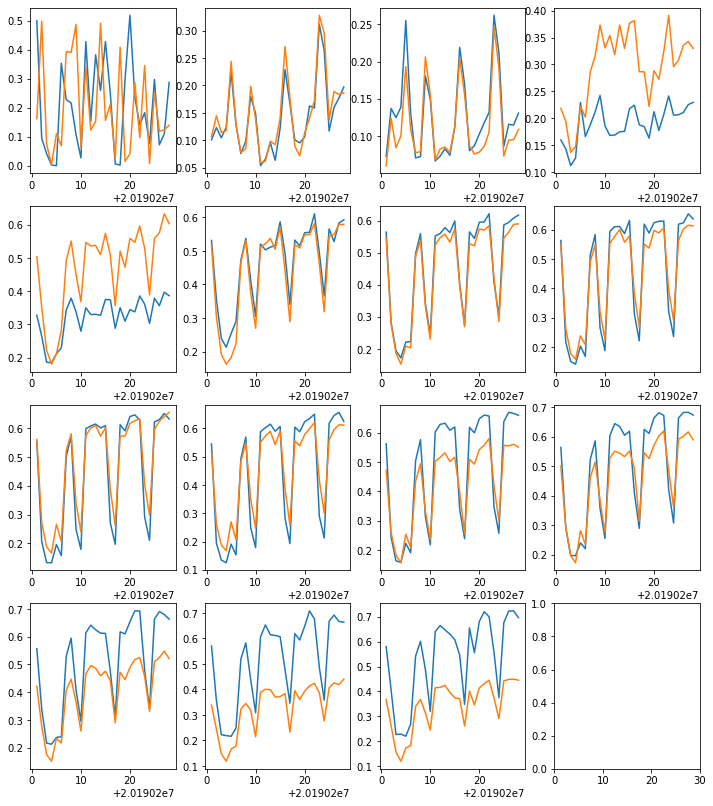

In [35]:
fig, axes = plt.subplots(nrows=4,ncols=4)
fig.set_size_inches(12, 14)
axes[0][0].plot(HDONG_0["STD_YMD"], S_HDONG_0[0])
axes[0][0].plot(HDONG_0["STD_YMD"], S_HDONG_0[15])
axes[0][1].plot(HDONG_0["STD_YMD"], S_HDONG_0[1])
axes[0][1].plot(HDONG_0["STD_YMD"], S_HDONG_0[16])
axes[0][2].plot(HDONG_0["STD_YMD"], S_HDONG_0[2])
axes[0][2].plot(HDONG_0["STD_YMD"], S_HDONG_0[17])
axes[0][3].plot(HDONG_0["STD_YMD"], S_HDONG_0[3])
axes[0][3].plot(HDONG_0["STD_YMD"], S_HDONG_0[18])
axes[1][0].plot(HDONG_0["STD_YMD"], S_HDONG_0[4])
axes[1][0].plot(HDONG_0["STD_YMD"], S_HDONG_0[19])
axes[1][1].plot(HDONG_0["STD_YMD"], S_HDONG_0[5])
axes[1][1].plot(HDONG_0["STD_YMD"], S_HDONG_0[20])
axes[1][2].plot(HDONG_0["STD_YMD"], S_HDONG_0[6])
axes[1][2].plot(HDONG_0["STD_YMD"], S_HDONG_0[21])
axes[1][3].plot(HDONG_0["STD_YMD"], S_HDONG_0[7])
axes[1][3].plot(HDONG_0["STD_YMD"], S_HDONG_0[22])
axes[2][0].plot(HDONG_0["STD_YMD"], S_HDONG_0[8])
axes[2][0].plot(HDONG_0["STD_YMD"], S_HDONG_0[23])
axes[2][1].plot(HDONG_0["STD_YMD"], S_HDONG_0[9])
axes[2][1].plot(HDONG_0["STD_YMD"], S_HDONG_0[24])
axes[2][2].plot(HDONG_0["STD_YMD"], S_HDONG_0[10])
axes[2][2].plot(HDONG_0["STD_YMD"], S_HDONG_0[25])
axes[2][3].plot(HDONG_0["STD_YMD"], S_HDONG_0[11])
axes[2][3].plot(HDONG_0["STD_YMD"], S_HDONG_0[26])
axes[3][0].plot(HDONG_0["STD_YMD"], S_HDONG_0[12])
axes[3][0].plot(HDONG_0["STD_YMD"], S_HDONG_0[27])
axes[3][1].plot(HDONG_0["STD_YMD"], S_HDONG_0[13])
axes[3][1].plot(HDONG_0["STD_YMD"], S_HDONG_0[28])
axes[3][2].plot(HDONG_0["STD_YMD"], S_HDONG_0[14])
axes[3][2].plot(HDONG_0["STD_YMD"], S_HDONG_0[29])
plt.xlim(0, 30)
plt.ylim(0, 1)
plt.show()